# Принятие решений в бизнесе - проект Яндекс Практикум

# Описание проекта
**Текст, выделенный полужирным шрифтом**
   
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.  
   




# План выполнения проекта:
      
## Часть 1. Приоритизация гипотез.  
      
В файле `/datasets/hypothesis.csv` 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами `Reach`, `Impact`, `Confidence`, `Effort`.
      
**Задача:**  
* Применим фреймворк `ICE` для приоритизации гипотез. Отсортируем их по убыванию приоритета.  
* Применим фреймворк `RICE` для приоритизации гипотез. Отсортируем их по убыванию приоритета.  
* Укажем, как изменилась приоритизация гипотез при применении `RICE` вместо `ICE`. Объясните, почему так произошло.
  
## Часть 2. Анализ A/B-теста.    
      
Вы провели A/B-тест и получили результаты, которые описаны в файлах `/datasets/orders.csv` и `/datasets/visitors.csv`.
    
**Задача:**  
      
Проанализируйте A/B-тест:  



1.   Построим график кумулятивной выручки по группам. Сделаем выводы и предположения. 
2.   Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения. 
3.   Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.
4.   Построим график кумулятивного среднего количества заказов по группам. Сделаем выводы и предположения.
5.   Построим график относительного изменения кумулятивного среднего количества заказов группы B к группе A. Сделаем выводы и предположения.
6.   Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.
7.   Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей. 
8.   Построим точечный график стоимостей заказов. Сделаем выводы и предположения. 
9.   Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.
10.  Посчитаем статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным. Сделаем выводы и предположения.
11.  Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.
12.  Посчитаем статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным. Сделаем выводы и предположения.   
13.  Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.  
14.  Примим решение по результатам теста и объясним его.  
     1.  Остановить тест, зафиксировать победу одной из групп. 
     2.  Остановить тест, зафиксировать отсутствие различий между группами. 
     3.  Продолжить тест.  
  






      
# Описание данных 
      
**Данные для первой части:**  
      
Файл `/datasets/hypothesis.csv`

*   `Hypothesis` — краткое описание гипотезы; 
*   `Reach` — охват пользователей по 10-балльной шкале; 
*   `Impact` — влияние на пользователей по 10-балльной шкале;  
*   `Confidence` — уверенность в гипотезе по 10-балльной шкале;  
*   `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.  
    
**Данные для второй части**  
      
Файл `/datasets/orders.csv `
      
*   `transactionId` — идентификатор заказа;  
*   `visitorId` — идентификатор пользователя, совершившего заказ;  
*   `date` — дата, когда был совершён заказ;  
*   `revenue` — выручка заказа;  
*   `group` — группа A/B-теста, в которую попал заказ.  
      
Файл `/datasets/visitors.csv `
      
*   `date` — дата;  
*   `group` — группа A/B-теста;  
*   `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста.     
     
</div>

# Загрузите данные и подготовьте их к анализу

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
try: 
    hypothesis = pd.read_csv('/content/hypothesis.csv')
    orders = pd.read_csv('/content/orders.csv')
    visitors = pd.read_csv('/content/visitors.csv')
except:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')

## Проведем предобработку  **`hypothesis`**

In [3]:
hypothesis.info()

pd.options.display.max_colwidth = 100

hypothesis.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [4]:
hypothesis.columns = [x.lower() for x in hypothesis.columns] 

hypothesis.head(5)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [5]:
print(f"Количество явных дубликатов: {hypothesis.duplicated().sum()}")

Количество явных дубликатов: 0


In [6]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


## Проведем предобработку  **`orders`**

In [7]:
orders.info()

orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [8]:
orders = orders.rename(columns={'transactionId': 'transaction_id','visitorId': 'visitor_id'})

In [9]:
print(f"Количество явных дубликатов: {orders.duplicated().sum()}")

Количество явных дубликатов: 0


In [10]:
orders['date'] = pd.to_datetime(orders['date'])

In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


## Проведем предобработку  **`visitors`**

In [12]:
visitors.info()

visitors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [13]:
print(f"Количество явных дубликатов: {visitors.duplicated().sum()}")

Количество явных дубликатов: 0


In [14]:
visitors['date'] = pd.to_datetime(visitors['date'])

In [15]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


## Поиск пользователей, попавших в обе группы

In [16]:
duplicated_users = orders.groupby('visitor_id')['group'].nunique()
duplicated_users = duplicated_users[duplicated_users > 1]

print(f"Количество пользователей, попавших в обе группы: {len(duplicated_users)}")

Количество пользователей, попавших в обе группы: 58


In [17]:
orders = orders.query('visitor_id not in @duplicated_users.index')


    
Удаление пользователей, которые попали в обе группы в A/B тесте, называется "очисткой пересечения" и используется для устранения возможного влияния пересечения на результаты тестирования.  

При проведении A/B тестирования группы пользователей должны быть разделены случайным образом на контрольную и тестовую группы, чтобы получить объективную оценку влияния изменений. Если некоторые пользователи попадают в обе группы, это может привести к смещению результатов тестирования.  

Например, если пользователь попал в обе группы и увидел разные версии страницы, он может стать более склонным к совершению действия, которое мы измеряем в тесте. Это может привести к искажению результатов тестирования и сделать их менее достоверными.  

Поэтому, чтобы получить более точные результаты, рекомендуется удалять пользователей, которые попали в обе группы. Это помогает убедиться, что результаты тестирования действительно отражают влияние изменений, а не влияние факторов, связанных с пересечением групп.  
    


    

## Вывод

Три таблицы были выгружены и проверены на отсутствие пропущенных значений и дубликатов. Названия колонок были переименованы для корректности, а также были преобразованы данные, где это было необходимо.
Также были найдены и удалены пользователи, которые находили в двух группах.

# Часть 1. Приоритизация гипотез.  
      
В файле `/datasets/hypothesis.csv` 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами `Reach`, `Impact`, `Confidence`, `Effort`.
      
**Задача:**  
* Применим фреймворк `ICE` для приоритизации гипотез. Отсортируем их по убыванию приоритета.  
* Применим фреймворк `RICE` для приоритизации гипотез. Отсортируем их по убыванию приоритета.  
* Укажем, как изменилась приоритизация гипотез при применении `RICE` вместо `ICE`. Объясните, почему так произошло.

## Применим фреймворк `ICE` для приоритизации гипотез. Отсортируем их по убыванию приоритета. 
image.png

In [18]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis['ICE'] = hypothesis['ICE'].round(2)
hypothesis = hypothesis.sort_values(by='ICE', ascending=False)

In [19]:
hypothesis

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


Мы можем заметить, что гипотезы под номерами 8, 0, 7, 6 и 2 являются наиболее значимыми с точки зрения их потенциального влияния на выручку, не учитывая охват пользователей.

## Применим фреймворк `RICE` для приоритизации гипотез. Отсортируем их по убыванию приоритета.  

image.png

In [20]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis['RICE'] = hypothesis['RICE'].round(2)
hypothesis = hypothesis.sort_values(by='RICE', ascending=False)

In [21]:
hypothesis

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


Заметно, что после использования метода RICE порядок приоритетности гипотез изменился, и теперь наиболее перспективными гипотезами будут те, которые имеют номера 7, 2, 0, 6 и 8 в порядке убывания важности.

## Объяснение разницы между `ICE` и `RICE`.




Оба фреймворка используются для приоритизации задач или функциональностей в продукте, но они различаются в способе расчета приоритета.

Фреймворк ICE (Impact, Confidence, Ease) использует следующую формулу для определения приоритета задачи:

`ICE = (Impact x Confidence x Ease)`

где Impact (влияние) - оценка того, как сильно задача повлияет на метрики продукта, Confidence (уверенность) - уверенность в том, что изменения повлияют на метрики продукта, Ease (легкость) - оценка того, насколько легко реализовать задачу.

Фреймворк RICE (Reach, Impact, Confidence, Ease) учитывает еще один фактор - охват (Reach), то есть, сколько пользователей затронет изменение. Формула для расчета RICE:

`RICE = (Reach x Impact x Confidence x Ease)`

где Reach (охват) - оценка того, сколько пользователей затронет изменение.

Таким образом, RICE учитывает не только силу воздействия на метрики продукта, но и количество пользователей, которых это изменение затронет, что может быть важным для бизнеса, особенно если есть ограничения по ресурсам.

Поэтому, при использовании RICE вместо ICE, более приоритетными будут задачи с большим охватом пользователей, даже если их влияние на метрики продукта не очень большое.



## Укажем, как изменилась приоритизация гипотез при применении `RICE` вместо `ICE`. Объясните, почему так произошло.

Гипотеза "**Запустить акцию, дающую скидку на товар в день рождения**" имеет самый высокий показатель ICE, равный 9 по impact и confidence, но при этом имеет минимальное значение reach - только 1, что означает, что она окажет минимальное влияние и затронет небольшое количество пользователей.

С другой стороны, гипотеза "**Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок**" имеет самый высокий показатель RICE, благодаря высокому значению reach, равному 10. Это означает, что добавление формы подписки окажет большее влияние и затронет большое количество пользователей, которые могут стать лояльными к компании в будущем.

Кроме того, стоит отметить, что топ-5 гипотез по обоим фреймворкам одинаковы, но порядок их приоритетности отличается. Поэтому следует обратить внимание на эти пять гипотез в первую очередь при принятии решения.

# Часть 2. Анализ A/B-теста.    
      
Вы провели A/B-тест и получили результаты, которые описаны в файлах `/datasets/orders.csv` и `/datasets/visitors.csv`.
    
**Задача:**  
      
Проанализируйте A/B-тест:  



1.   Построим график кумулятивной выручки по группам. Сделаем выводы и предположения. 
2.   Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения. 
3.   Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.
4.   Построим график кумулятивного среднего количества заказов по группам. Сделаем выводы и предположения.
5.   Построим график относительного изменения кумулятивного среднего количества заказов группы B к группе A. Сделаем выводы и предположения.
6.   Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.
7.   Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей. 
8.   Построим точечный график стоимостей заказов. Сделаем выводы и предположения. 
9.   Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.
10.  Посчитаем статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным. Сделаем выводы и предположения.
11.  Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.
12.  Посчитаем статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным. Сделаем выводы и предположения.   
13.  Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.  
14.  Примим решение по результатам теста и объясним его.  
     1.  Остановить тест, зафиксировать победу одной из групп. 
     2.  Остановить тест, зафиксировать отсутствие различий между группами. 
     3.  Продолжить тест.  

## Построим график кумулятивной выручки по группам. Сделаем выводы и предположения. 

In [22]:
unique_dates_groups = orders[['date', 'group']].drop_duplicates()

orders_aggregated = unique_dates_groups.apply(
    lambda x: orders[
        (orders['date'] <= x['date']) & (orders['group'] == x['group'])
    ].agg({
        'date': 'max',
        'group': 'max',
        'transaction_id': 'nunique',
        'visitor_id': 'nunique',
        'revenue': 'sum'
    }),
    axis=1
).sort_values(by=['date', 'group'])

visitors_aggregated = unique_dates_groups.apply(
    lambda x: visitors[
        (visitors['date'] <= x['date']) & (visitors['group'] == x['group'])
    ].agg({
        'date': 'max',
        'group': 'max',
        'visitors': 'sum'
    }),
    axis=1
).sort_values(by=['date', 'group'])

cumulative_data = orders_aggregated.merge(
    visitors_aggregated, 
    left_on=['date', 'group'], 
    right_on=['date', 'group']
)

cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulative_data.head()


,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


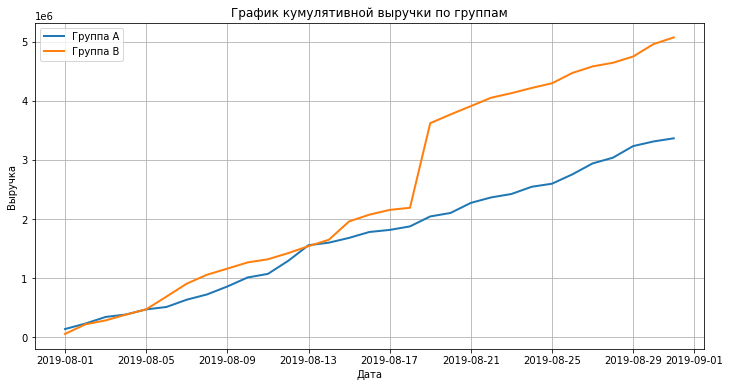

In [23]:
# Создаем датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_A = cumulative_data[cumulative_data['group'] == 'A'][['date', 'revenue', 'orders']]

# Создаем датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_B = cumulative_data[cumulative_data['group'] == 'B'][['date', 'revenue', 'orders']]

# Строим график выручки группы А и группы B на одном графике
plt.figure(figsize=(12, 6))

plt.grid(True)

plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue'], linewidth=2, label='Группа A')

plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue'],linewidth=2,  label='Группа B')

plt.legend()

plt.title('График кумулятивной выручки по группам')

plt.xlabel('Дата')

plt.ylabel('Выручка')

plt.show()


График кумулятивной выручки, построенный на необработанных данных, показывает, что А/В-тестирование проводилось в течение всего августа 2019 года. В первой половине месяца выручка в группах А и В росла примерно с одинаковой скоростью, хотя группа В показала небольшое преимущество. . Однако после 17 августа в группе В произошел резкий рост выручки, что значительно увеличило разрыв между группами, а затем темпы роста выручки стали примерно одинаковыми.


## Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.

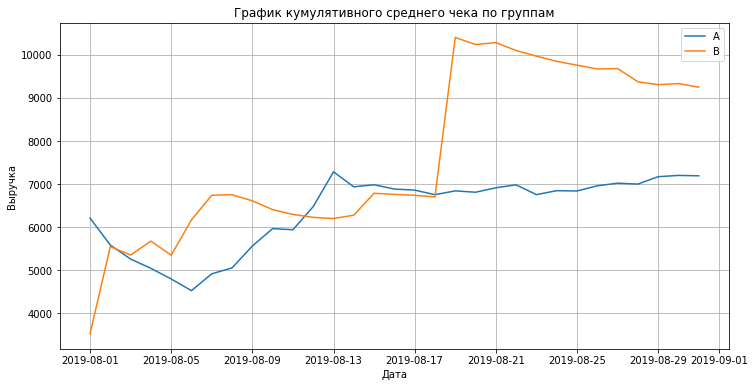

In [24]:
# создание графика среднего чека по группам теста
plt.figure(figsize=(12,6))

plt.grid(True)

# построение графика среднего чека для группы А
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue']/cumulative_revenue_A['orders'], label='A')

# построение графика среднего чека для группы B
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue']/cumulative_revenue_B['orders'], label='B')

plt.legend()

plt.title('График кумулятивного среднего чека по группам')

plt.xlabel('Дата')

plt.ylabel('Выручка');



Из графика изменения среднего чека можно заметить, что до 17-18 числа он изменялся максимум на 2000 единиц 6-7 числа, а затем стабилизировался. Однако, после виден резкий скачок в группе В, что может быть вызван несколькими крупными заказами, и это искажает результаты теста. 

## Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.

Text(0, 0.5, 'Отношение среднего чека группы B к группе A')

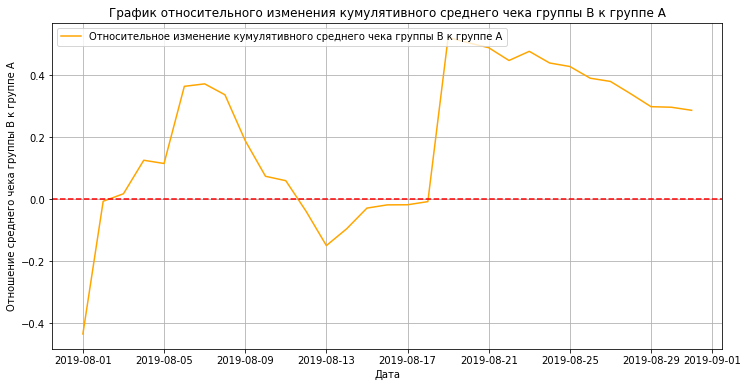

In [25]:
# объединение данных по кумулятивной выручке групп A и B в одном датафрейме
merged_cumulative_revenue = cumulative_revenue_A.merge(cumulative_revenue_B, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# создание графика отношения средних чеков группы B к группе A по дням
plt.figure(figsize=(12,6))
plt.grid(True)

plt.plot(merged_cumulative_revenue['date'], (merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])/(merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA'])-1,label="Относительное изменение кумулятивного среднего чека группы B к группе A",color='orange')

# добавление горизонтальной оси X на уровне 0
plt.axhline(y=0, color='red', linestyle='--')

plt.legend(loc='upper left')

plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')

plt.xlabel('Дата')

plt.ylabel('Отношение среднего чека группы B к группе A')


Из графика отношения кумулятивного среднего чека группы А к группе В видно, что за период теста было два пика, когда средний чек группы В значительно превышал показатель группы А, но затем быстро снижался. Однако, такие резкие изменения могут быть вызваны наличием выбросов в выборке, что искажает результаты и делает предположения о различии в средних чеках между группами недостоверными.

## Построим график кумулятивного среднего количества заказов по группам. Сделаем выводы и предположения.


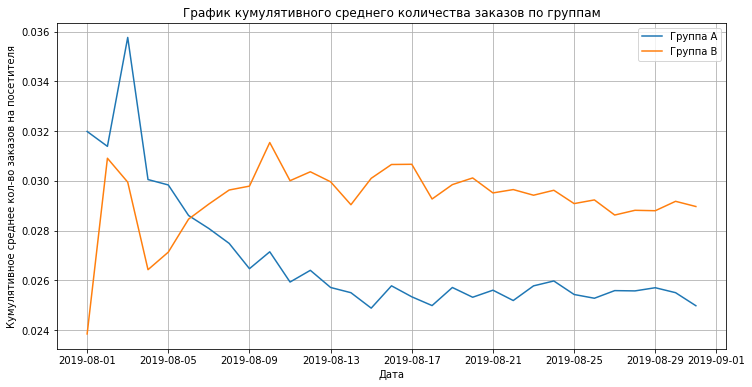

In [26]:
# Рассчитываем кумулятивную конверсию для каждой группы
cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visitors']

# Отбираем данные для группы A
cumulative_data_a = cumulative_data[cumulative_data['group'] == 'A']

# Отбираем данные для группы B
cumulative_data_b = cumulative_data[cumulative_data['group'] == 'B']

# Строим графики кумулятивной конверсии
plt.figure(figsize=(12,6))
plt.grid(True)
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='Группа A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='Группа B')
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Кумулятивное среднее кол-во заказов на посетителя')
plt.title('График кумулятивного среднего количества заказов по группам');

В первую неделю проведения теста в обеих группах был наблюдаем резкий рост среднего количества покупок на посетителя, затем группы начали различаться.

В группе А среднее количество покупок на посетителя упало с уровня 0.036 до 0.027 и стабильно держалось на этом уровне почти до конца теста.

В группе B после пика на уровне 0.031 произошло резкое снижение до 0.027, но затем среднее количество покупок на посетителя постепенно возрастало и достигло уровня 0.031, который оставался стабильным.

В результате колебания среднего количества покупок на посетителя в начале теста были выровнены, и группа B оказалась стабильно более успешной, чем группа A.

## Построим график относительного изменения кумулятивного среднего количества заказов группы B к группе A. Сделаем выводы и предположения.


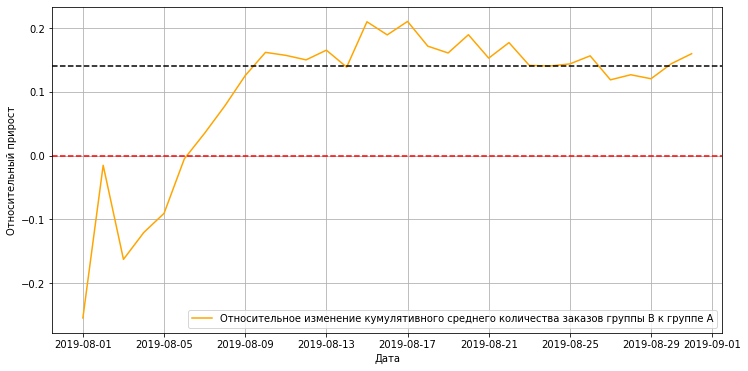

In [27]:
merged_cumulative_conversions = cumulative_data_a[['date','conversion']].merge(cumulative_data_b[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(12,6))
plt.grid(True)
plt.plot(merged_cumulative_conversions['date'], merged_cumulative_conversions['conversionB']/merged_cumulative_conversions['conversionA']-1, label="Относительное изменение кумулятивного среднего количества заказов группы B к группе A",color='orange')
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Относительный прирост')

plt.axhline(y=0, color='red', linestyle='--')
plt.axhline(y=0.14, color='black', linestyle='--');

В начале эксперимента группа B значительно отставала от группы A, однако в дальнейшем она опередила первую группу  и стабилизируется на уровне 0.14. В среднем, кумулятивное среднее количество заказов на посетителя  в группе В на 14% выше, чем в группе А.



## Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.


In [28]:
orders_by_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

print(orders_by_users.sort_values(by='transaction_id', ascending=False).head(10))

     visitor_id  transaction_id
908  3967698036               3
55    249864742               3
478  2108163459               3
687  2988190573               3
890  3908431265               3
138   611059232               3
632  2742574263               3
157   678354126               2
323  1404560065               2
452  1985475298               2


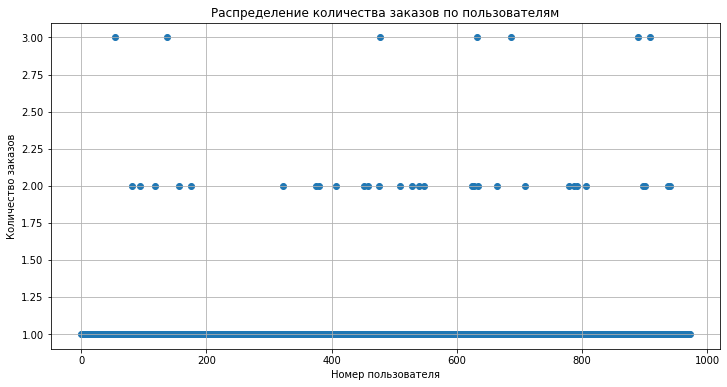

In [29]:
x_values = pd.Series(range(0, len(orders_by_users)))
plt.figure(figsize=(12,6))
plt.grid(True)
plt.scatter(x_values, orders_by_users['transaction_id'])
plt.xlabel('Номер пользователя')
plt.ylabel('Количество заказов')
plt.title('Распределение количества заказов по пользователям');

Большая часть пользователей делает заказ 1 раз

## Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей. 


In [30]:
print(np.percentile(orders_by_users['transaction_id'], [95, 99]))

[1. 2.]


Менее чем 1% пользователей оформляли более 2 заказов и менее чем 5% пользователей делали более одного заказа. 

Аномальных пользователей будем отсеять по 99 перцентилю

In [31]:
limit_number_orders = 2

## Построим точечный график стоимостей заказов. Сделаем выводы и предположения. 


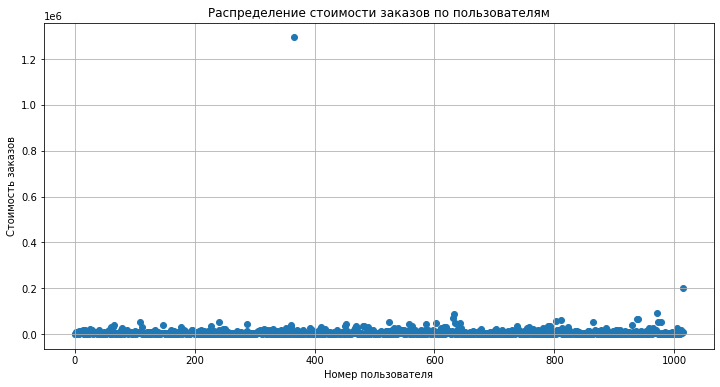

In [32]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(12,6))
plt.grid(True)
plt.scatter(x_values, orders['revenue']);
plt.xlabel('Номер пользователя')
plt.ylabel('Стоимость заказов')
plt.title('Распределение стоимости заказов по пользователям');

Вероятно, один крупный заказ оказал влияние на графики выручки и среднего чека, так как он был очень дорогим.

## Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.


In [33]:
print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


Не больше чем 1% заказов имеют стоимость выше 53904 рублей, а не больше чем 5% заказов имеют стоимость выше 26785 рублей.

Аномальных пользователей будем отсеять по 99 перцентилю

In [34]:
limit_cost_orders = 53904

## Посчитаем статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным. Сделаем выводы и предположения.


In [35]:
visitors_a_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']

visitors_a_cumulative = visitors_a_daily.apply(
    lambda x: visitors_a_daily[visitors_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_a': 'sum'}), axis=1,)

visitors_a_cumulative.columns = ['date', 'visitors_cumulative_a']

visitors_b_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']

visitors_b_cumulative = visitors_b_daily.apply(
    lambda x: visitors_b_daily[visitors_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_b': 'sum'}), axis=1,)

visitors_b_cumulative.columns = ['date', 'visitors_cumulative_b']

orders_a_daily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'}))

orders_a_daily.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']

orders_a_cumulative = orders_a_daily.apply(
    lambda x: orders_a_daily[orders_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_a': 'sum', 'revenue_per_date_a': 'sum'}), axis=1).sort_values(by=['date'])

orders_a_cumulative.columns = ['date', 'orders_cumulative_a', 'revenue_cumulative_a']

orders_b_daily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'}))

orders_b_daily.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']

orders_b_cumulative = orders_b_daily.apply(
    lambda x: orders_b_daily[orders_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_b': 'sum', 'revenue_per_date_b': 'sum'}), axis=1).sort_values(by=['date'])

orders_b_cumulative.columns = ['date', 'orders_cumulative_b', 'revenue_cumulative_b']

data = (
    orders_a_daily.merge(orders_b_daily, left_on='date', right_on='date', how='left')
    .merge(orders_a_cumulative, left_on='date', right_on='date', how='left')
    .merge(orders_b_cumulative, left_on='date', right_on='date', how='left')
    .merge(visitors_a_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_b_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_a_cumulative, left_on='date', right_on='date', how='left')
    .merge(visitors_b_cumulative, left_on='date', right_on='date', how='left'))

display(data.head(5))

,date,orders_per_date_a,revenue_per_date_a,orders_per_date_b,revenue_per_date_b,orders_cumulative_a,revenue_cumulative_a,orders_cumulative_b,revenue_cumulative_b,visitors_per_date_a,visitors_per_date_b,visitors_cumulative_a,visitors_cumulative_b
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Описание данных в таблице **data**:
- `date` — дата;
- `orders_per_date_a` — количество заказов в выбранную дату в группе A;
- `revenue_per_date_a` — суммарная выручка в выбранную дату в группе A;
- `orders_per_date_b` — количество заказов в выбранную дату в группе B;
- `revenue_per_date_b` — суммарная выручка в выбранную дату в группе B;
- `orders_cumulative_a` — суммарное число заказов до выбранной даты включительно в группе A;
- `revenue_cumulative_a` — суммарная выручка до выбранной даты включительно в группе A;
- `orders_cumulative_b` — суммарное количество заказов до выбранной даты включительно в группе B;
- `revenue_cumulative_b` — суммарная выручка до выбранной даты включительно в группе B;
- `visitors_per_date_a` — количество пользователей в выбранную дату в группе A;
- `visitors_per_date_b` — количество пользователей в выбранную дату в группе B;
- `visitors_cumulative_a` — количество пользователей до выбранной даты включительно в группе A;
- `visitors_cumulative_b` — количество пользователей до выбранной даты включительно в группе B.

									

Создадим переменные **orders_by_visitors_a** и **orders_by_visitors_b** со столбцами `visitor_id`, `orders`. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [36]:
orders_by_visitors_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id')['transaction_id']
    .nunique()
    .reset_index()
    .rename(columns={'transaction_id': 'orders'})
)

orders_by_visitors_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id')['transaction_id']
    .nunique()
    .reset_index()
    .rename(columns={'transaction_id': 'orders'})
)

Объявим переменные **sample_a** и **sample_b**, в которых пользователям из разных групп будет соответствовать количество заказов

In [37]:
sample_a = pd.concat([
    orders_by_visitors_a['orders'], 
    pd.Series(
        0, 
        index=np.arange(
            data['visitors_per_date_a'].sum() - len(orders_by_visitors_a['orders'])
        ),
        name='orders'
    )
])

sample_b = pd.concat([
    orders_by_visitors_b['orders'], 
    pd.Series(
        0, 
        index=np.arange(
            data['visitors_per_date_b'].sum() - len(orders_by_visitors_b['orders'])
        ),
        name='orders'
    )
])

Мы проведем анализ  статистическей значимости различий в среднем количестве заказов между группами A и B на «сырых» данных, то есть без удаления аномальных пользователей. Затем мы выведем относительные различия в среднем количестве заказов группы B и сформулируем нулевую и альтернативную гипотезы:  

- $H_0$ — различий в среднем количестве заказов на посетителя групп A и B нет
- $H_1$ — среднее значение в среднем количестве заказов на посетителя в группе B отличается от среднего значения метрики в группе A

Критический уровень статистической значимости примем равным 5%  
alpha = 0.05

Метод проверки гипотез - критерий Манна Уитни

Важно отметить, что U-тест Манна-Уитни также не требует предположения о равной выборочной численности в группах. Это означает, что мы можем использовать этот тест, даже если наши две выборки имеют различный размер.

Еще одним преимуществом U-теста Манна-Уитни является его чувствительность к выбросам. Тест использует ранги данных, а не их фактические значения, поэтому выбросы в данных не смещают результаты теста так сильно, как это может произойти в случае использования t-теста Стьюдента.


In [38]:
p_value = stats.mannwhitneyu(sample_a, sample_b)[1]
print('p-value: {0:.3f}'.format(p_value))

relative_conversion_gain = sample_b.mean() / sample_a.mean() - 1
print('Относительные различия в среднем количестве заказов на посетителя группы B: {0:.3f}'.format(relative_conversion_gain))

p-value: 0.011
Относительные различия в среднем количестве заказов на посетителя группы B: 0.160


- P-value меньше 0.05, значит отвергаем нулевую гипотезу.
- По «сырым» данным есть в среднем количестве заказов на посетителя групп A и B.
- Относительные различия в среднем количестве заказов на посетителя группы B составил 16%.

## Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.


Мы произведём расчёт статистической значимости различий в среднем чеке между группами на «сырых» данных. Затем мы найдём относительные различия в среднем чеке между группами и сформулируем нулевую и альтернативную гипотезы:  
- $H_0$ — различий в среднем чеке групп A и B нет
- $H_1$ — есть различия в среднем чеке групп A и B

Критический уровень статистической значимости примем равным 5%  
alpha = 0.05

In [39]:
print('p-value: {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group'] == 'A']['revenue'], orders[orders['group'] == 'B']['revenue'])[1]))

print('Относительные различия в среднем чеке: {0:.3f}'
      .format(orders[orders['group'] == 'B']['revenue'].mean() / orders[orders['group'] == 'A']['revenue'].mean() - 1))

p-value: 0.829
Относительные различия в среднем чеке: 0.287


- P-value значительно больше 0.05.
- Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет, хотя средний чек группы B значительно выше среднего чека группы A. Скорее всего повлиял выброс со стоимостью заказа свыше 1200000 рублей.
- Необходимо удалить аномальных пользователей и рассчитать показатели по очищеным данным.

## Удаление аномальных пользователей

In [40]:
# Находим посетителей со слишком большим количеством заказов
visitors_with_many_orders_a = orders_by_visitors_a[orders_by_visitors_a['orders'] > np.percentile(orders_by_visitors_a['orders'],99)]['visitor_id']
visitors_with_many_orders_b = orders_by_visitors_b[orders_by_visitors_b['orders'] > np.percentile(orders_by_visitors_b['orders'],99)]['visitor_id']
users_with_many_orders = pd.concat([visitors_with_many_orders_a, visitors_with_many_orders_b], axis=0)

# Находим посетителей с дорогими заказами
users_with_expensive_orders = orders[orders['revenue'] > np.percentile(orders['revenue'],99)]['visitor_id']

# Объединить оба типа ненормальных пользователей
abnormal_users = pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0).drop_duplicates().sort_values()

relative_losses = abnormal_users.shape[0]/orders['visitor_id'].nunique()

# Вывести первых 5 ненормальных пользователей и общее количество ненормальных пользователей
print(abnormal_users.head(5))
print(abnormal_users.shape)

print(f'Количество аномальных пользователей составило: {abnormal_users.shape[0]}, что соответствует {relative_losses:.1%} относительно общего числа пользователей')


1099    148427295
33      249864742
58      611059232
949     887908475
744     888512513
Name: visitor_id, dtype: int64
(16,)
Количество аномальных пользователей составило: 16, что соответствует 1.6% относительно общего числа пользователей


- 16 аномальных пользователей

Объявим переменные **sampleAFiltered** и **sampleBFiltered**, в которых пользователям из разных групп будет соответствовать количество заказов, но без аномальных пользователей

In [41]:
# Отфильтровать заказы от ненормальных пользователей в группе A
sample_a_filtered = pd.concat(
    [        orders_by_visitors_a[~orders_by_visitors_a['visitor_id'].isin(abnormal_users)]['orders'],
        pd.Series(0, index=np.arange(data['visitors_per_date_a'].sum() - len(orders_by_visitors_a['orders'])), name='orders')
    ],
    axis=0
)

# Отфильтровать заказы от ненормальных пользователей в группе В
sample_b_filtered = pd.concat(
    [        orders_by_visitors_b[~orders_by_visitors_b['visitor_id'].isin(abnormal_users)]['orders'],
        pd.Series(0, index=np.arange(data['visitors_per_date_b'].sum() - len(orders_by_visitors_b['orders'])), name='orders')
    ],
    axis=0
)

## Посчитаем статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным. Сделаем выводы и предположения.   


In [42]:
p_value = stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]
print('p-value: {0:.3f}'.format(p_value))

relative_conversion_gain = sample_b_filtered.mean() / sample_a_filtered.mean() - 1
print('Относительные различия в среднем количестве заказов на посетителя группы B: {0:.3f}'.format(relative_conversion_gain))

p-value: 0.007
Относительные различия в среднем количестве заказов на посетителя группы B: 0.189


- P-value, по прежнему, меньше 0.05, значит отвергаем нулевую гипотезу.
- Есть различия в среднем количестве заказов на посетителя групп A и B.
- Относительные различия в среднем количестве заказов на посетителя B составил 18,9%.

## Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.  


In [43]:
filtered_orders_a = orders[np.logical_and(orders['group'] == 'A', ~orders['visitor_id'].isin(abnormal_users))]['revenue']
filtered_orders_b = orders[np.logical_and(orders['group'] == 'B', ~orders['visitor_id'].isin(abnormal_users))]['revenue']
p_value = stats.mannwhitneyu(filtered_orders_a, filtered_orders_b)[1]
print(f"p-value: {p_value:.3f}")


mean_revenue_a = filtered_orders_a.mean()
mean_revenue_b = filtered_orders_b.mean()
relative_diff = mean_revenue_b / mean_revenue_a - 1
print(f"Относительные различия в среднем чеке: {relative_diff:.3f}")


p-value: 0.788
Относительные различия в среднем чеке: -0.032


- P-value, по прежнему, значительно больше 0.05.
- Значит нет причин отвергать нулевую гипотезу.
- Относительные различия в среднем чеке составили -3,2%
- Нет статистически значимого различия по среднему чеку между группами

## Примим решение по результатам теста и объясним его.  
     1.  Остановить тест, зафиксировать победу одной из групп. 
     2.  Остановить тест, зафиксировать отсутствие различий между группами. 
     3.  Продолжить тест.  



*   Между группами на основе «сырых» и «очищенных» данных выявлено значимое статистическое различия в среднем количестве заказов на посетителя.
*   График различия в среднем количестве заказов  на посетителя между группами указывает на то, что результаты группы B лучше, чем у группы A, так как они остаются ближе к среднему значению.
*   Ни по «сырым», ни по «очищенным» данным не обнаружено статистически значимого различия в среднем чеке между группами.
*   График различия в среднем чеке не стабилен, именно благодаря этому были выявлены аномалии. Однако на основании этого графика нельзя сделать определенных выводов.

***Основываясь на обнаруженных фактах, можно остановить тест и признать его успешным, так как различия в среднем количестве заказов  на посетителя в группе В превышает различия в среднем количестве заказов в группе А.***